# Modelagem de Preços do Airbnb 
Usando os dados de http://insideairbnb.com/get-the-data.html seremos capazes de criar um modelo de aprendizado de máquina para estimar o preço dos Apartamentos inseridos no AirBng. Estamos aplicando os resultados como parte do teste da empresa Cognitivo


In [262]:
import random
random.seed(42)

Em seguida, importamos as listagens reunidas no arquivo csv.

In [263]:
#Extraindo as informações do link
import pandas as pd

file = 'listings.csv.gz' 
df = pd.read_csv(file, compression="gzip", low_memory=False)

In [264]:
#Analisando as Colunas do Dataframe
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [265]:
#Analisando as Variáveis
len(df.columns)

74

In [266]:
pd.set_option('display.max_columns', None)
pd.set_option('max_rows', None)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20211026045247,2021-10-26,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived in NYC for ...,within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Hangers"", ""Elevator"", ""C...",$350.00,5,180,5,5,180,180,5.0,180.0,NaN,t,0,19,26,262,2021-10-26,266,12,1,2011-03-30,2021-05-21,4.68,4.78,4.63,4.82,4.90,4.76,4.65,NaN,f,1,1,0,0,2.07
1,24480,https://www.airbnb.com/rooms/24480,20211026045247,2021-10-26,"Nice and cozy near Ipanema Beach, w/ home office","My studio is located in the best of Ipanema, t...","The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\nI am a human being fighting f...,within a day,50%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Air conditioning"", ...",$296.00,3,90,3,7,10,1125,3.1,1087.2,NaN,t,0,0,0,57,2021-10-26,85,0,0,2013-08-20,2017-04-22,4.73,4.83,4.78,4.90,4.90,4.97,4.58,NaN,f,1,1,0,0,0.85
2,25026,https://www.airbnb.com/rooms/25026,20211026045247,2021-10-26,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, State of Rio de Janeiro, Brazil","Hi guys, We're a lovely team of 3 people:\r\n\...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9e204...,https://a0.muscache.com/im/pictures/user/9e204...,Copacabana,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97735,-43.19105,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Essentials"", ""Kitchen"", ""TV with 

In [267]:
#Verificação da quantidade de informações missing (nulas)
df.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               21
description                                      1222
neighborhood_overview                           10633
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           5
host_since                                          5
host_location                                      78
host_about                                      11860
host_response_time                               6766
host_response_rate                               6766
host_acceptance_rate                             8369
host_is_superhost                                   5
host_thumbnail_url          

### De cara, já podemos eliminar algumas variáveis com uma quantidade siginifcante de dados nulos (>30%, essa é uma regra que costumo utilizar)

In [268]:
missing = ['neighbourhood_group_cleansed', 
'bathrooms', 
'calendar_updated', 
'license', 
'host_about', 
'neighborhood_overview', 
'neighbourhood', 
'host_neighbourhood', 
'review_scores_accuracy', 
'review_scores_cleanliness', 
'review_scores_checkin', 
'review_scores_location', 
'review_scores_communication', 
'review_scores_value', 
'host_acceptance_rate', 
'first_review', 
'last_review', 
'review_scores_rating', 
'reviews_per_month', 
'host_response_time', 
'host_response_rate', 
'description', 
'host_location', 
'bathrooms_text', 
'name', 
'host_name', 
'host_since', 
'host_is_superhost', 
'host_thumbnail_url', 
'host_picture_url', 
'host_listings_count', 
'host_has_profile_pic', 
'host_identity_verified', 
'id', 
'listing_url', 
'scrape_id', 
'last_scraped', 
'picture_url', 
'host_id', 
'host_url', 
'host_verifications', 
'amenities', 
'has_availability', 
'calendar_last_scraped', 
'number_of_reviews', 
'number_of_reviews_ltm', 
'number_of_reviews_l30d']

df.drop(missing, axis=1, inplace=True)

In [269]:
#Análise da quantidade restante de missings
df.isnull().sum()

host_total_listings_count                          5
neighbourhood_cleansed                             0
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bedrooms                                        1488
beds                                             192
price                                              0
minimum_nights                                     0
maximum_nights                                     0
minimum_minimum_nights                             0
maximum_minimum_nights                             0
minimum_maximum_nights                             0
maximum_maximum_nights                             0
minimum_nights_avg_ntm                             0
maximum_nights_avg_ntm                             0
availability_30                               

In [270]:
#Contando a quantidade de Linhas não nulas por variável
df.count()

host_total_listings_count                       23354
neighbourhood_cleansed                          23359
latitude                                        23359
longitude                                       23359
property_type                                   23359
room_type                                       23359
accommodates                                    23359
bedrooms                                        21871
beds                                            23167
price                                           23359
minimum_nights                                  23359
maximum_nights                                  23359
minimum_minimum_nights                          23359
maximum_minimum_nights                          23359
minimum_maximum_nights                          23359
maximum_maximum_nights                          23359
minimum_nights_avg_ntm                          23359
maximum_nights_avg_ntm                          23359
availability_30             

In [271]:
#Retirando as linhas nulas
df.dropna(inplace= True)

In [272]:
#Verificando se rodou corretamente e restou algum dado nulo
df.isnull().sum()

host_total_listings_count                       0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bedrooms                                        0
beds                                            0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
availability_30                                 0
availability_60                                 0


In [273]:
len(df.columns)

27

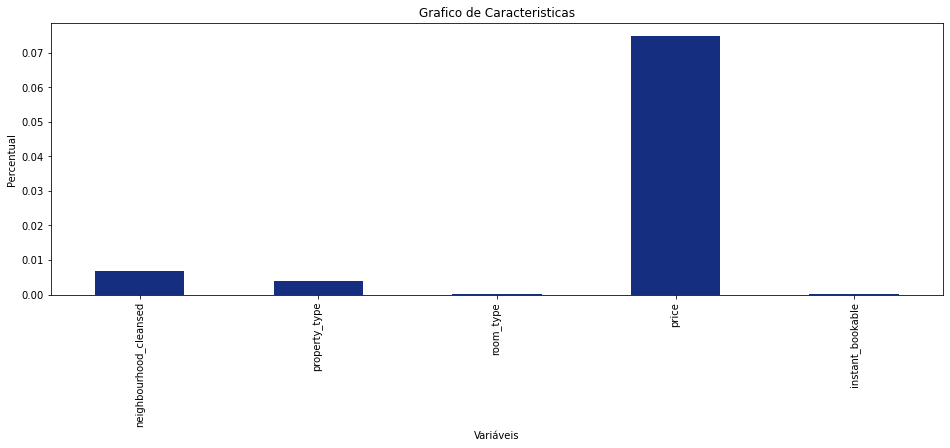

In [274]:
#analisando as variáveis categórias para depois tratá-las
import matplotlib.pyplot as plt
%matplotlib inline

categoricos = df.columns[df.dtypes == 'object']
percentual = listings[categoricos].nunique() / df.shape[0]

ax = percentual.plot(kind = 'bar', color='#162e80', figsize = (16, 5))
ax.set_xlabel('Variáveis')
ax.set_ylabel('Percentual')
ax.set_title('Grafico de Caracteristicas')
plt.show()


In [275]:
#Tratando a variável 'price'
df['price'] = df['price'].str.replace('\$|,', '')
df['price'] = pd.to_numeric(df['price'])
df.head()

<ipython-input-275-4c665fb4e48a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace('\$|,', '')


,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2.0,Copacabana,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5,2.0,2.0,350.0,5,180,5,5,180,180,5.0,180.0,0,19,26,262,f,1,1,0,0
1,0.0,Ipanema,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2,1.0,1.0,296.0,3,90,3,7,10,1125,3.1,1087.2,0,0,0,57,f,1,1,0,0
2,3.0,Copacabana,-22.97735,-43.19105,Entire rental unit,Entire home/apt,2,1.0,1.0,168.0,4,90,4,7,15,90,4.1,87.6,0,16,25,300,f,1,1,0,0
3,1.0,Ipanema,-22.98839,-43.19232,Entire rental unit,Entire home/apt,2,1.0,1.0,278.0,2,89,2,2,89,89,2.0,89.0,0,0,0,179,f,1,1,0,0
4,1.0,Copacabana,-22.98107,-43.19136,Entire loft,Entire home/apt,2,1.0,1.0,150.0,3,15,3,6,10,15,3.1,14.8,4,9,13,59,f,1,1,0,0


### Variáveis Selecionadas
Pelo nome de algumas variáveis já supus que deveriam ser retiradas.

In [276]:
df.columns

Index(['host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'instant_bookable', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [277]:
len(df.columns)

27

### Tratando variáveis categóricas

In [279]:
#Tratando variáveis categórias
import numpy as np
from sklearn import preprocessing

def tratar_categoricas(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
#aplicando em uma cópia do nosso dataframe
copia = df.copy()

copia = copia.apply(tratar_categoricas)

#### Matrix de Correlação

In [280]:
correlacao = copia.corr()

correlacao

,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_total_listings_count,1.000000,-0.029698,-0.065902,0.075636,-0.082308,-0.101014,0.163016,0.120622,0.095217,0.032570,0.004073,0.096134,0.012971,0.047782,0.011295,0.014278,0.013987,-0.015688,-0.030380,-0.024546,-0.019051,-0.013073,-0.032907,0.647358,0.643746,0.168547,-0.010047
neighbourhood_cleansed,-0.029698,1.000000,0.211030,-0.134529,0.138188,0.146868,-0.009531,0.021339,0.017811,0.015151,-0.017358,-0.002396,-0.014740,-0.031773,0.006300,-0.004535,-0.017424,-0.001201,0.100960,0.088492,0.098438,0.081103,0.005668,-0.065315,-0.077654,0.024279,0.046948
latitude,-0.065902,0.211030,1.000000,0.340520,0.193402,0.191172,-0.135112,-0.136528,-0.079013,-0.022146,-0.015270,0.002256,-0.016606,-0.039039,0.026054,0.019185,0.005251,0.023321,0.089513,0.081897,0.096832,0.080725,0.038891,-0.115784,-0.136737,0.059031,0.049565
longitude,0.075636,-0.134529,0.340520,1.000000,0.011758,-0.012099,-0.096851,-0.125979,-0.091035,-0.018619,-0.020231,0.014892,-0.022911,0.001204,0.015685,0.024353,0.005212,0.003492,-0.151663,-0.138013,-0.145578,-0.092583,-0.047350,0.105844,0.104348,0.030181,0.010667
property_type,-0.082308,0.138188,0.193402,0.011758,1.000000,0.950775,-0.356663,-0.281918,-0.155277,-0.011571,-0.098164,-0.020324,-0.096565,-0.127258,-0.020293,-0.025860,-0.043839,-0.003514,0.222616,0.188518,0.191719,0.127842,0.043086,-0.104402,-0.213956,0.429227,0.376680
room_type,-0.101014,0.146868,0.191172,-0.012099,0.950775,1.000000,-0.395391,-0.300827,-0.185375,-0.020660,-0.106203,-0.027486,-0.104675,-0.137802,-0.020908,-0.027719,-0.048322,-0.002753,0.228406,0.192139,0.194665,0.129550,0.037584,-0.132953,-0.245084,0.473728,0.311165
accommodates,0.163016,-0.009531,-0.135112,-0.096851,-0.356663,-0.395391,1.000000,0.682422,0.670247,0.093970,0.043154,0.044776,0.046623,0.062529,0.004412,0.009249,0.025846,-0.001368,0.016904,0.023211,0.019482,0.048886,-0.047801,0.161053,0.198857,-0.171934,-0.026925
bedrooms,0.120622,0.021339,-0.136528,-0.125979,-0.281918,-0.300827,0.682422,1.000000,0.565804,0.103129,0.071394,0.019840,0.075247,0.078579,-0.015054,-0.018536,0.031629,-0.023357,0.044092,0.038534,0.037542,0.054770,-0.052953,0.115588,0.140148,-0.089310,-0.082592
beds,0.095217,0.017811,-0.079013,-0.091035,-0.155277,-0.185375,0.670247,0.565804,1.000000,0.061909,0.012574,0.028744,0.014621,0.024567,-0.002381,0.001990,0.007174,-0.006393,0.018600,0.019235,0.015875,0.046567,-0.024960,0.080845,0.093311,-0.082439,0.069239
price,0.032570,0.015151,-0.022146,-0.018619,-0.011571,-0.020660,0.093970,0.103129,0.061909,1.000000,0.025409,0.002782,0.025332,0.021818,-0.015747,-0.018415,0.010290,-0.012652,0.039282,0.034285,0.036498,0.038864,-0.006246,0.023967,0.025738,-0.012798,-0.000051


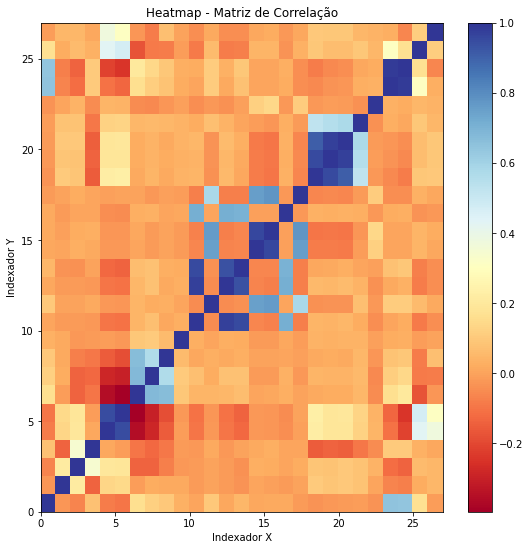

In [281]:
# Exibir mapa de calor 
plt.figure(figsize=(9, 9))
plt.pcolor(correlacao, cmap='RdYlBu')
plt.xlabel('Indexador X')
plt.ylabel('Indexador Y')
plt.title('Heatmap - Matriz de Correlação')
plt.colorbar()

plt.show()

Existe multicolinearidade em algumas variáveis como `calculated_host_listings_count` e`calculated_host_listings_count_entire_homes`quando correlacionadas com, `host_total_listings_count`.  Todas as variáveis com multicolinearidade, serão retiradas conforme abaixo.

In [282]:
retirar = ['calculated_host_listings_count_entire_homes', 'calculated_host_listings_count', 'availability_30', 'availability_60', 'availability_90']
df = df.drop(retirar, axis=1)

In [283]:
df.head()

,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_365,instant_bookable,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2.0,Copacabana,-22.96599,-43.17940,Entire condominium (condo),Entire home/apt,5,2.0,2.0,350.0,5,180,5,5,180,180,5.0,180.0,262,f,0,0
1,0.0,Ipanema,-22.98405,-43.20189,Entire rental unit,Entire home/apt,2,1.0,1.0,296.0,3,90,3,7,10,1125,3.1,1087.2,57,f,0,0
2,3.0,Copacabana,-22.97735,-43.19105,Entire rental unit,Entire home/apt,2,1.0,1.0,168.0,4,90,4,7,15,90,4.1,87.6,300,f,0,0
3,1.0,Ipanema,-22.98839,-43.19232,Entire rental unit,Entire home/apt,2,1.0,1.0,278.0,2,89,2,2,89,89,2.0,89.0,179,f,0,0
4,1.0,Copacabana,-22.98107,-43.19136,Entire loft,Entire home/apt,2,1.0,1.0,150.0,3,15,3,6,10,15,3.1,14.8,59,f,0,0


### Utilização de Variáveis Dummies

In [284]:
df_modificado = pd.get_dummies(df)
df_modificado.shape

(21701, 261)

### Modelagem - Dividindo o Dataframe em Treino e Teste

In [285]:
# Embaralhamendo nos dados para garantir aleatóriedade
from sklearn.utils import shuffle
df_modificado = shuffle(df_modificado)

In [286]:
# Variável Resposta e Demais
y = df_modificado['price']
X = df_modificado.drop('price', axis = 1)

In [287]:
# Treino e Teste
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

train_X = np.array(train_X)
test_X = np.array(test_X)
train_y = np.array(train_y)
test_y = np.array(test_y)

train_X.shape, test_X.shape

((16275, 260), (5426, 260))

## Modelando os dados
Aplicaremos 2 modelos de Machine Learning e avaliaremos os resultados.
obs: Poderiam ser aplicados vários outros algoritmos, porém como o intuito é mostrar o manuseio da ferramenta, não aprofundarei muito nos casos.

* Biblioteca Utilizada: Scikit-learn
* Algoritmos: RandomForestRegressor e LinearRegression


### Random Forest

In [288]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Pipeline Padrão (SimpleImputer + scaler + regressor)
modelo_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(random_state=42))

# Ajuste o modelo
modelo_RF.fit(train_X, train_y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

##### Avaliando o Modelo

Utilizaremos as metricas do erro absoluto médio e o erro quadrático médio quadrado (RMSE) atravez de função.

In [289]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

def avaliacao(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE)) 

In [290]:
avaliacao(modelo_RF, test_X, test_y)

Median Absolute Error: 144.76
RMSE: 3341.27


##### Avaliando os dados de Treino do Modelo

In [291]:
avaliacao(modelo_RF, train_X, train_y)

Median Absolute Error: 49.54
RMSE: 2498.22


##### Análise do Grau de Importância

In [296]:
importancia = modelo_RF.steps[2][1].feature_importances_
percentual_importancia = pd.DataFrame({"Variável":X.columns.values, "Percentual_Importancia":importancia})
percentual_importancia.sort_values("Percentual_Importancia", ascending=False).head(10)

,Variável,Percentual_Importancia
1,latitude,0.139884
257,room_type_Shared room,0.096059
2,longitude,0.091033
13,maximum_nights_avg_ntm,0.089921
246,property_type_Shared room in residential home,0.087170
0,host_total_listings_count,0.057405
10,minimum_maximum_nights,0.054049
7,maximum_nights,0.051899
11,maximum_maximum_nights,0.047563
14,availability_365,0.034136


In [299]:
# Check do Somatório de Impor
percentual_importancia.Percentual_Importancia.sum()

1.0

#### Considerações

Poderíamos analisar os hiperparâmetros e ajustá-los para uma melhoria do Modelo, porém acredito não vir ao caso neste cenário.

### Aplicação de Regressão Linear Múltipla


In [301]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



# Pipeline Padrão: SimpleImputation + Scale + Feature Selection + MLP regressor
modelo_RL = make_pipeline(SimpleImputer(), StandardScaler(), 
                               LinearRegression())

# Ajustar o modelo
modelo_RL.fit(train_X, train_y)

avaliacao(modelo_RL, test_X, test_y)

Median Absolute Error: 327.12
RMSE: 1885829152012508.5


##### Avaliando os dados de Treino do Modelo

In [302]:
avaliacao(modelo_RL, train_X, train_y)

Median Absolute Error: 320.34
RMSE: 5689.42


### Comparação de  modelos

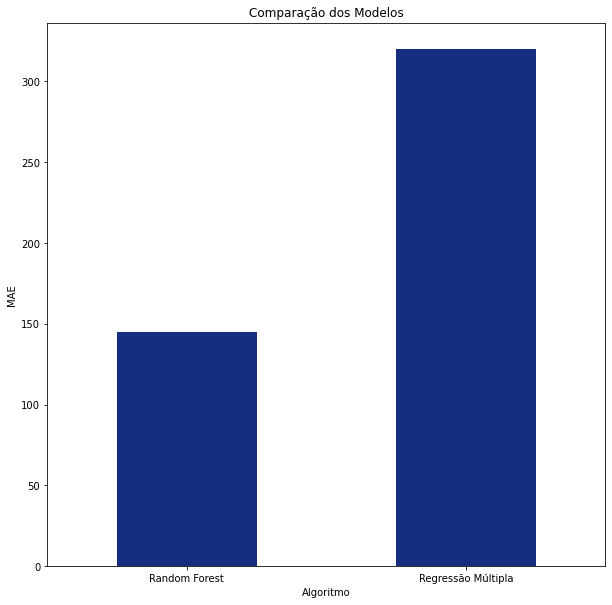

In [304]:
comparacao = pd.DataFrame({'MAE':[144.76, 320.34]},
                        index = ['Random Forest','Regressão Múltipla'])
comparacao = comparacao.sort_values('MAE')
plt.figure(figsize=(10,10))
ax = comparacao.MAE.plot(kind='bar', align = 'center', color='#162e80')
plt.xticks(rotation=0)
plt.xlabel('Algoritmo')
plt.ylabel('MAE')
plt.title('Comparação dos Modelos')
plt.show()

## Conclusão

O modelo Random Forest apresentou o menor MAE, por isso podemos utilizá-lo para a previsão de preços do AirBnb.